# 스팸 메일 분류기
> 캐글에서 제공하는 스팸 메일 데이터를 통해 스팸 메일 분류기를 구현 <br>
다양한 모델을 사용하여 모델 비교 및 평가 진행

## import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터셋 다운로드 및 데이터 탐색

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


> 불필요한 열 삭제 : Unnamed:2 , Unnamed:3 , Unnamed:4 열은 텍스트 분류를 할 때 불필요한 열. <br>
v1 : ham -> 정상 메일 spam -> 스팸 메일 <br>
v2 : 메일의 본문

In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# 불필요한 데이저 제거 및 v1열 값을 숫자로 변환 후 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
print("결측값 여부 :",data.isnull().values.any())

결측값 여부 : False


In [ ]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


> 총 5,572개의 샘플이 존재하는데 v2열에서 중복을 제거한 샘플의 개수가 5,169개라는 것은 403개의 중복 샘플이 존재한다는 의미입니다. 중복 샘플을 제거하고 전체 샘플 수를 확인

In [ ]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


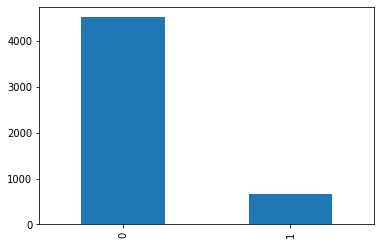

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653


In [ ]:
print(f'정상 메일의 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


In [ ]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 87.376%
스팸 메일 = 12.624%


In [ ]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 메일 = 87.331%
스팸 메일 = 12.669%


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


> 각 단어에 대한 등장 빈도수는 tokenizer.word_counts.items()를 출력해서 확인할 수 있다. <br>
 이를 응용하여 빈도수가 낮은 단어들이 훈련 데이터에서 얼만큼의 비중을 차지하는지 확인 -> 등장 빈도수가 1회 밖에 되지 않는 단어들이 전체 단어 집합에서 알만큼의 비율을 차지하며, 전체 훈련 데이터에서 등장 빈도로 얼만큼의 비율을 차지하는지 확인

In [ ]:
word_to_index = tokenizer.word_index
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


> 등장 빈도가threshold 값인 2회 미만 -> 1회 밖에 되지 않는 단어들은 단어 집합에서 절반 가까이를 차지 한다.

In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7822


메일의 최대 길이 : 189
메일의 평균 길이 : 15.754534


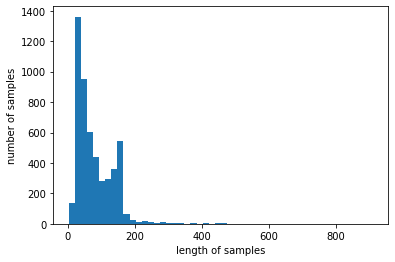

In [ ]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


## 모델 1 : [RNN](https://wikidocs.net/22886)으로 스팸 메일 분류하기

> RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model_1 = Sequential()
model_1.add(Embedding(vocab_size, embedding_dim))
model_1.add(SimpleRNN(hidden_units))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_1 = model_1.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 22s 271ms/step - loss: 0.3934 - acc: 0.8712 - val_loss: 0.2002 - val_acc: 0.9698
Epoch 2/10
52/52 [==============================] - 8s 163ms/step - loss: 0.1406 - acc: 0.9667 - val_loss: 0.0993 - val_acc: 0.9758
Epoch 3/10
52/52 [==============================] - 9s 167ms/step - loss: 0.0670 - acc: 0.9849 - val_loss: 0.0766 - val_acc: 0.9770
Epoch 4/10
52/52 [==============================] - 8s 163ms/step - loss: 0.0380 - acc: 0.9891 - val_loss: 0.0692 - val_acc: 0.9819
Epoch 5/10
52/52 [==============================] - 8s 161ms/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0667 - val_acc: 0.9843
Epoch 6/10
52/52 [==============================] - 8s 162ms/step - loss: 0.0192 - acc: 0.9946 - val_loss: 0.2937 - val_acc: 0.8924
Epoch 7/10
52/52 [==============================] - 9s 166ms/step - loss: 0.0464 - acc: 0.9834 - val_loss: 0.0953 - val_acc: 0.9698
Epoch 8/10
52/52 [==============================] - 9s 165ms/step - loss: 0

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model_1.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 1s 16ms/step - loss: 0.1196 - acc: 0.9739

 테스트 정확도: 0.9739


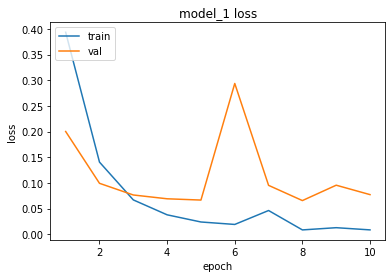

In [ ]:
epochs = range(1, len(history_1.history['acc']) + 1)
plt.plot(epochs, history_1.history['loss'])
plt.plot(epochs, history_1.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 모델 2 : 나이브 베이즈 분류 *모델*

> [나이브 베이즈 분류 모델](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification)은 스팸 메일 필터, 텍스트 분류, 감정 분석, 추천 시스템 등에 광범위하게 활용되는 분규 기법이다.<br>
Feature -> 광고성 단어 개수, 비속어 개수, 성적 용어 개수 등... (각각이 하나의 Feature이며, 하나의 분류 모델에는 여러 개의 Feature가 있음, 서로 독립(independent))<br>
Label -> 스팸 메일인 경우 Label = 1, 스팸 메일이 아닌 경우 Label = 0

> 나이브 베이즈 분류는 베이즈 정리에 기반한 통계적 분류 기법.<br>
나이브 베이즈 분류기는 빠르고, 정확하며, 정확성도 높고 대용량 데이터에 대해 속도도 빠르다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

In [ ]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(4135, 7596)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(4135, 7596)


In [ ]:
model_2 = MultinomialNB()
model_2.fit(tfidfv, y_train)

MultinomialNB()

In [ ]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [ ]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model_2.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.9526112185686654


## 모델 3 : 1D CNN으로 자연어 분류하기

> 본래 CNN은 이미지 처리를 하기 위해 만들어진 아키텍처이다.<br>
이미지 처리 당시 CNN의 필터(ex.9칸)가 이미지의 지역적인 정보를 추출하는 역할을 한다면, 텍스트 CNN의 필터는 텍스트의 지역적인 정보, 즉 단어 등장순서/문맥 정보를 보존할 수 있다.

In [ ]:
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
print('import done')

import done


In [ ]:
model_3 = Sequential()
model_3.add(Embedding(1000,20,input_length=max_len))
model_3.add(Dropout(0.2))
model_3.add(Conv1D(64,3,padding='valid',activation='relu',strides=1))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(256))
model_3.add(Dropout(0.2))
model_3.add(Activation('relu'))
model_3.add(Dense(1))
model_3.add(Activation('sigmoid'))
model_3.summary()
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc',metrics.binary_accuracy])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 189, 20)           20000     
                                                                 
 dropout (Dropout)           (None, 189, 20)           0         
                                                                 
 conv1d (Conv1D)             (None, 187, 64)           3904      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
history_3 = model_3.fit(X_train_padded,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.2)                     

Epoch 1/10
104/104 [==============================] - 12s 9ms/step - loss: 0.4169 - acc: 0.8673 - binary_accuracy: 0.8673 - val_loss: 0.3357 - val_acc: 0.8779 - val_binary_accuracy: 0.8779
Epoch 2/10
104/104 [==============================] - 1s 5ms/step - loss: 0.2868 - acc: 0.8727 - binary_accuracy: 0.8727 - val_loss: 0.2593 - val_acc: 0.8779 - val_binary_accuracy: 0.8779
Epoch 3/10
104/104 [==============================] - 1s 5ms/step - loss: 0.2068 - acc: 0.8981 - binary_accuracy: 0.8981 - val_loss: 0.2264 - val_acc: 0.9274 - val_binary_accuracy: 0.9274
Epoch 4/10
104/104 [==============================] - 1s 5ms/step - loss: 0.1533 - acc: 0.9492 - binary_accuracy: 0.9492 - val_loss: 0.1718 - val_acc: 0.9480 - val_binary_accuracy: 0.9480
Epoch 5/10
104/104 [==============================] - 1s 5ms/step - loss: 0.0532 - acc: 0.9840 - binary_accuracy: 0.9840 - val_loss: 0.1045 - val_acc: 0.9746 - val_binary_accuracy: 0.9746
Epoch 6/10
104/104 [==============================] - 1s 5m

In [ ]:
print("\n 테스트 정확도: %.4f" % (model_3.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 5ms/step - loss: 0.1021 - acc: 0.9787 - binary_accuracy: 0.9787

 테스트 정확도: 0.9787


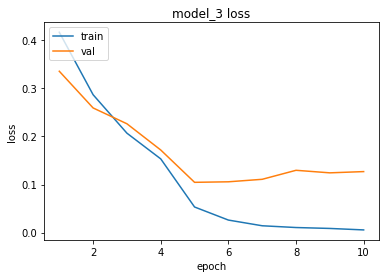

In [ ]:
epochs = range(1, len(history_3.history['acc']) + 1)
plt.plot(epochs, history_3.history['loss'])
plt.plot(epochs, history_3.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()